# Introduction to Artificial Intelligence: HS 2023


---

## Lecture 5: Linear Models for Classification

##  Breast Cancer Diagnosis via Logistic Regression

In this demo, we will be focusing on breast cancer classification using logistic regression using the following dataset:

*   https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic
*   https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data

## Importing Libraries


In [ ]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn import datasets, linear_model, preprocessing

## Loading  Dataset
Next, we load the dataset directly from the UCI website.

In [ ]:
names = ['id','thick','size_unif','shape_unif','marg','cell_size','bare',
         'chrom','normal','mit','class']
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data',
                 na_values='?', header=None, names=names)
df.head(15)

,id,thick,size_unif,shape_unif,marg,cell_size,bare,chrom,normal,mit,class
0,1000025,5,1,1,1,2,1.0,3,1,1,2
1,1002945,5,4,4,5,7,10.0,3,2,1,2
2,1015425,3,1,1,1,2,2.0,3,1,1,2
3,1016277,6,8,8,1,3,4.0,3,7,1,2
4,1017023,4,1,1,3,2,1.0,3,1,1,2
5,1017122,8,10,10,8,7,10.0,9,7,1,4
6,1018099,1,1,1,1,2,10.0,3,1,1,2
7,1018561,2,1,2,1,2,1.0,3,1,1,2
8,1033078,2,1,1,1,2,1.0,1,1,5,2
9,1033078,4,2,1,1,2,1.0,2,1,1,2


**Dataframes:**

To better understand the data/dataframe, we use a set of functions available from pandas, which are summarised as follows:

- `.head()` prints the header of a given dataframe.
- `.dtypes` describes the datatypes of all columns in the dataframe.
- `.info()` provides an overview of the different column data types and missing values in the given dataframe
- `.describe()` returns a distribution of numeric columns in the dataframe
- `.isna().sum()` provides the number of missing values per column in our DataFrame
- `.unique()` retrieves the unique values in a given dataframe column

<br>

**Visualisation:**

- `sns.displot()` plots the distribution of one column in your dataframe.

In [ ]:
# describes the datatype of all columns:
df.dtypes

id              int64
thick           int64
size_unif       int64
shape_unif      int64
marg            int64
cell_size       int64
bare          float64
chrom           int64
normal          int64
mit             int64
class           int64
dtype: object

In [ ]:
# provide an overview of the different column data types and missing values:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          699 non-null    int64  
 1   thick       699 non-null    int64  
 2   size_unif   699 non-null    int64  
 3   shape_unif  699 non-null    int64  
 4   marg        699 non-null    int64  
 5   cell_size   699 non-null    int64  
 6   bare        683 non-null    float64
 7   chrom       699 non-null    int64  
 8   normal      699 non-null    int64  
 9   mit         699 non-null    int64  
 10  class       699 non-null    int64  
dtypes: float64(1), int64(10)
memory usage: 60.2 KB


In [ ]:
# display number of missing values per column:
df.isna().sum()

id             0
thick          0
size_unif      0
shape_unif     0
marg           0
cell_size      0
bare          16
chrom          0
normal         0
mit            0
class          0
dtype: int64

In [ ]:
# In this dataset, there are missing values, therefore we remove empty cells.
df.dropna(inplace=True)
df.isna().sum()

id            0
thick         0
size_unif     0
shape_unif    0
marg          0
cell_size     0
bare          0
chrom         0
normal        0
mit           0
class         0
dtype: int64

In [ ]:
# Plot the unique class labels
df['class'].unique()

array([2, 4])

In [ ]:
# As we have seen before, the values of our targets are either 2's or 4's. We have to map them as 0's and 1's, correspondingly.
# Hint: use the .map() method
class_dict = {2:0, 4:1} # dict: {key1:value1, key2:value2}
df['class'] = df['class'].map(class_dict)


array([0, 1])

In [ ]:
print(df['class'].unique())

[0 1]


Text(0.5, 1.0, 'Class distributions')

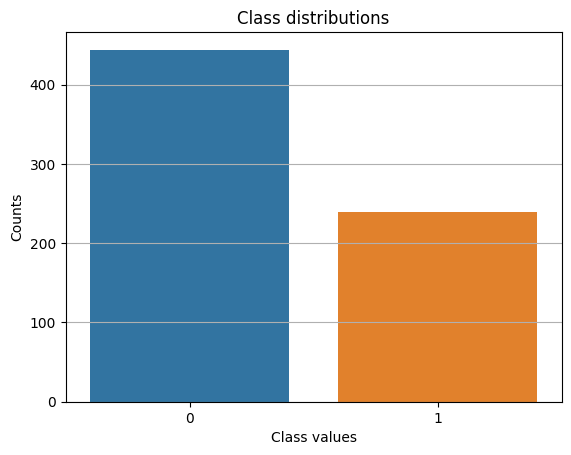

In [ ]:
plt.grid()
sns.countplot(data=df, x='class')
plt.xlabel('Class values')
plt.ylabel('Counts')
plt.title('Class distributions')

In [ ]:
# Getting class predictions and colour code samples
y = df['class'] # vector with 'n' samples
yBenign = (y==0) # getting the labels for the benign samples, through a boolean vector, True at the corresponding to benign positions
yMalign = (y==1) # getting the labels for the malign samples, through a boolean vector, True at the corresponding to malign positions

In [ ]:
print(yBenign)

0       True
1       True
2       True
3       True
4       True
       ...  
694     True
695     True
696    False
697    False
698    False
Name: class, Length: 683, dtype: bool


After loading the data, we can create a scatter plot of the data labeling the class values with different colors.  We will pick two of the features.  

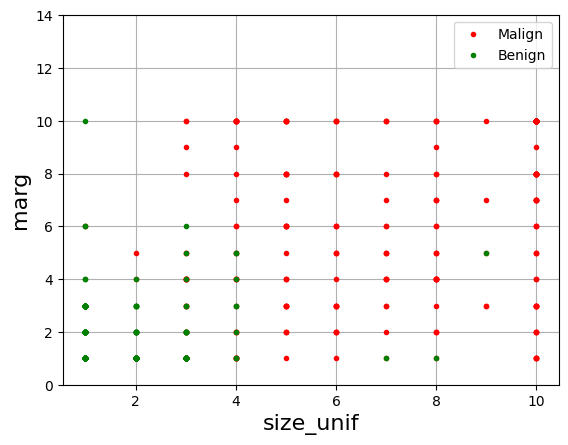

In [ ]:
# Get two predictors
xnames =['size_unif','marg']
X = np.array(df[xnames])

# Create the scatter plot
plt.plot(X[yMalign,0],X[yMalign,1],'r.')
plt.plot(X[yBenign,0],X[yBenign,1],'g.')
plt.xlabel(xnames[0], fontsize=16)
plt.ylabel(xnames[1], fontsize=16)
plt.ylim(0,14)
plt.grid()
plt.legend(['Malign','Benign'],loc='upper right')

We can improve the previous visualisation by plotting the frequencies of the data samples values according to their class labels and display them with different sizes.

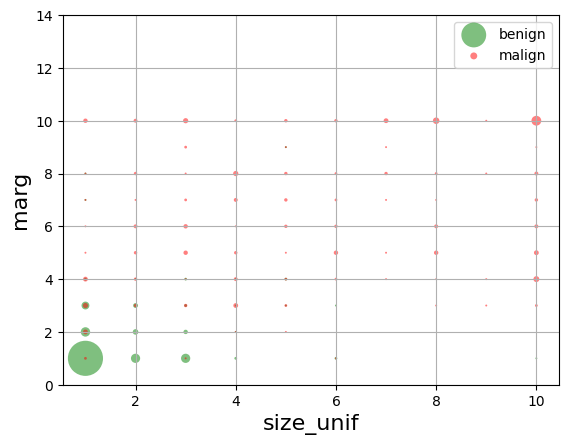

In [ ]:
def plot_cnt(X, y, legend=True):

    # Compute the bin edges for the 2d histogram
    x0val = np.array(list(set(X[:,0]))).astype(float)
    x1val = np.array(list(set(X[:,1]))).astype(float)
    x0, x1 = np.meshgrid(x0val,x1val)
    x0e = np.hstack((x0val, np.max(x0val)+1))
    x1e = np.hstack((x1val, np.max(x1val)+1))

    # Make a plot for each class
    yval = list(set(y))
    color = ['g','r']
    for i in range(len(yval)):
        classIdx = np.where(y==yval[i])[0]
        cnt, x0e, x1e = np.histogram2d(X[classIdx,0], X[classIdx,1],[x0e,x1e])
        x0, x1 = np.meshgrid(x0val,x1val)
        plt.scatter(x0.ravel(), x1.ravel(), s=2*cnt.ravel(),alpha=0.5, c=color[i],edgecolors='none')
    if legend:
        plt.ylim([0,14])
        plt.grid()
        plt.legend(['benign','malign'], loc='upper right')
        plt.xlabel(xnames[0], fontsize=16)
        plt.ylabel(xnames[1], fontsize=16)

plot_cnt(X,y)

## Logistic Regression

In logistic regression, we fit the weights $w=[w_0,w_1,...,w_k]$  to the model:
$$
    P(y=1|x) = \frac{1}{1+exp(-z)};  z = w_0 + w_1x_1 + ... + w_kx_k.
$$
For illustration purposes, we will first fit the model on the features `size_unif` and `marg`.

In [ ]:
# Access the feature values of the corresponding 'size_unif' and 'marg' columns.
xnames = ['size_unif', 'marg']
X = np.array(df[xnames])
print(X.shape)

(683, 2)


Next, we split the data into training and test

In [ ]:
# Split the (X,y)-annotated dataset onto a training a test dataset, by using 80%
# samples for training and 20% samples for testing. Also shuffle the samples.
# For that purposes, we will use the 'train_test_split' function contained in sklearn.model_selection
from sklearn.model_selection import train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(X, y, test_size=0.2, shuffle=True)

In [ ]:
print(xTrain.shape)

(546, 2)


Similar to the linear regression, we need to standardise the data before fitting the model. For that we can use the `StandardScaler` class from `sklearn.preprocessing`

In [ ]:
# We also will learn how to normalise the data using sklearn.
# This is very important, so as to give each of the features the same relevance.
# Thus, we use the standard scaler from sklearn preprocessing to Nnrmalise the different features using the StandardScaler
from sklearn.preprocessing import StandardScaler # import the corresponding feature scaler from sklearn.preprocessing

scaler = StandardScaler() # initialise the scaler
xTrainStd = scaler.fit_transform(xTrain) # fit the scaler to the training dataset => mean, std
xTestStd = scaler.transform(xTest) # apply the scaler onto the test dataset => (xtest-mean)/std

In [ ]:
scaler.mean_

array([3.12454212, 2.83333333])

In [ ]:
print(f'xTrainStd.shape: {xTrainStd.shape}')
print(f'yTrain.shape: {yTrain.shape}')
print(f'xTestStd.shape: {xTestStd.shape}')
print(f'yTest.shape: {yTest.shape}')

xTrainStd.shape: (546, 2)
yTrain.shape: (546,)
xTestStd.shape: (137, 2)
yTest.shape: (137,)


After that, we can use the `sklearn` package and use the `LogisticRegression()` classifier to fit the data. It has a parameter `C`, which controls the regularization level with higher values meaning less regularization. We will use a high value to minimally regularize the estimate.

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression() # Initialise the Logistic Regression Classifier
logreg.fit(xTrainStd, yTrain) # Fit the Logistic Regression parameters on the training dataset.

LogisticRegression()

In [ ]:
logreg.intercept_ # w0

array([-0.31033508])

In [ ]:
logreg.coef_ # w1, w2

array([[3.43444094, 1.18987912]])

In [ ]:
# We plot the estimated model parameters:
print('y = sigmoid(' + str('%.3f' % logreg.intercept_) + ' + ' + str('%.3f' % logreg.coef_[0][0]) + '*x1 + ' + str('%.3f' % logreg.coef_[0][1]) + '*x2) ')

y = sigmoid(-0.310 + 3.434*x1 + 1.190*x2) 


Finally, we can measure the accuracy on the test data.  You should get an accuracy more than $94\%$.

In [ ]:
yhat = logreg.predict(xTestStd) # Get the model's predictions on the test dataset.
accAvg = np.mean(yTest == yhat) # Compute the accuracy by averaging the number of matched predictions with the corresponding ground-truths.
print("Accuracy on test data = %f" % accAvg)

Accuracy on test data = 0.941606


[[85  2]
 [ 6 44]]


<Axes: >

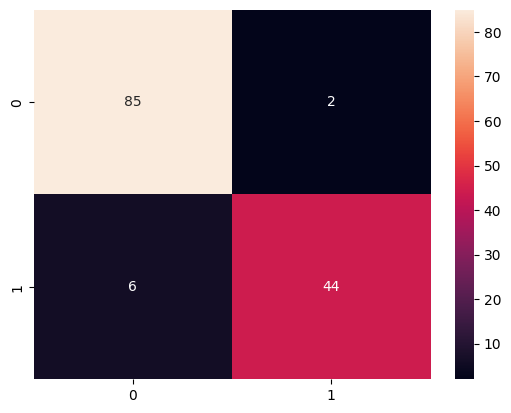

In [ ]:
# To have a better idea about the predictions for each single class, we additionally plot
# the confusion matrix.
# Hint: Have a look at confusion_matrix() from sklearn.metrics
# Also have a look at sns's heatmap() function.
cm = confusion_matrix(yTest, yhat)
print(cm)
sns.heatmap(data=cm, annot=True)

Plotting the probabilities as a function of the two variables is very useful for analysis. The plot below illustrates data samples, representing the probabilities assigned by the logistic model with a blue colour. This colour coding represents the likelihood of each data sample being malignant. Samples in the lower left quadrant demonstrate lower probabilities, while those in the upper right quadrant exhibit higher probabilities.

<ipython-input-44-139c284d3202>:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  blue_map = cm.get_cmap('Blues')


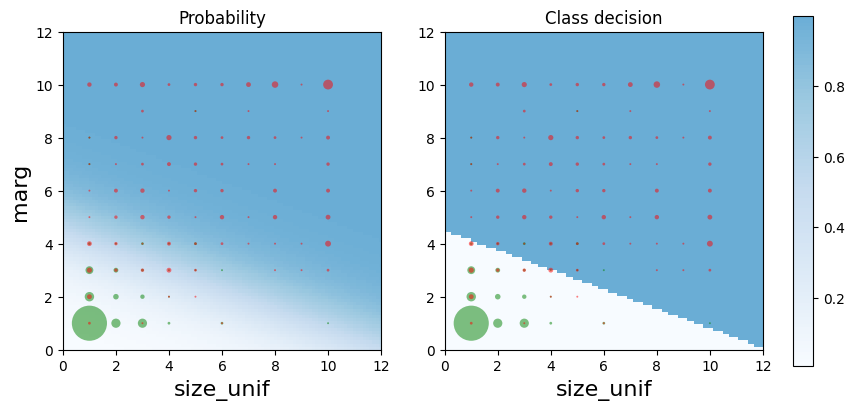

In [ ]:
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

blue_map = cm.get_cmap('Blues')
light_map = ListedColormap(blue_map(np.linspace(0,0.5,100)))

# Create grid of points to plot the data
xmin = np.array([0,0])
xmax = np.array([12,12])
nplot = 100
xp0 = np.linspace(xmin[0], xmax[0], nplot)
xp1 = np.linspace(xmin[1], xmax[1], nplot)
Xp0, Xp1 = np.meshgrid(xp0,xp1)
Xplot = np.column_stack((Xp0.ravel(), Xp1.ravel()))
Zplot = scaler.transform(Xplot)


prob = logreg.predict_proba(Zplot)[:,1] # Get class probabilities based on trained logistic regressor
prob_mat = np.fliplr(prob.reshape((nplot, nplot))).T

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
im = plt.imshow(prob_mat, extent=[xmin[0],xmax[0],xmin[1],xmax[1]], cmap=light_map)
plot_cnt(X,y, legend=False)
plt.xlabel(xnames[0], fontsize=16)
plt.ylabel(xnames[1], fontsize=16)
plt.title('Probability')

plt.subplot(1,2,2)
yhat = (prob_mat > 0.5).astype(float)
plt.imshow(yhat, extent=[xmin[0],xmax[0],xmin[1],xmax[1]], cmap=light_map)
plot_cnt(X,y, legend=False)
plt.xlabel(xnames[0], fontsize=16)
plt.title('Class decision')


plt.subplots_adjust(bottom=0.1, top=0.9, left=0.1, right=0.8)
cb_ax = plt.gcf().add_axes([0.83, 0.15, 0.02, 0.7])
plt.colorbar(im, cax=cb_ax)

## Multivariable Logistic Regression

Now, we fit the logistic regression model on the full dataset.

In [ ]:
# Get array of all the features, except the ID (in the first column)
# and target variable (in the last column)
xnames = names[1:-1]
X = np.array(df[xnames])
print(X.shape)

(683, 9)


In [ ]:
# Split the data onto training and test samples (70% of the samples for training and the rest for testing)
xTrain, xTest, yTrain, yTest = train_test_split(X, y, test_size=0.30)

Next, we scale the training and test by using the `StandardScaler()`. After that, we fit the model on the training data and score on the test data.  We see we get a little better accuracy.  The result will be around 97% accuracy depending on the train-test split.

In [ ]:
# Scale the data
scal = StandardScaler()
xTrain = scal.fit_transform(xTrain)
xTest = scal.transform(xTest)

In [ ]:
# Fit on the scaled trained data
reg = linear_model.LogisticRegression(C=1e5)
reg.fit(xTrain, yTrain)

In [ ]:
# Measure accuracy
yHat = reg.predict(xTest)
acc = np.mean(yHat == yTest)
print("Accuracy on test data = %f" % acc)

We can also evaluate the weights for each feature after fitting the Logistic Regression model.

In [ ]:
W = reg.coef_
data = {'feature': xnames, 'slope': np.squeeze(W)}
dfslope = pd.DataFrame(data=data)
dfslope

## Cross-fold Validation

Here we use cross fold validation to evaluate the average prediction of Logistic Regression. We report the mean and standard deviation of the accuracy over the different folds.


In [ ]:
from sklearn.model_selection import KFold
from sklearn.metrics import precision_recall_fscore_support

In [ ]:
nFolds = 5
kf = KFold(n_splits=nFolds)
accFold = np.zeros(nFolds)

In [ ]:
for idx, folds in enumerate(kf.split(X)):

    # Get the folds
    train, test = folds
    xTrainFold = X[train,:]
    yTrainFold = y[train]
    xTestFold = X[test,:]
    yTestFold = y[test]

    # Scale the data
    scal = StandardScaler()
    xTrainFold = scal.fit_transform(xTrainFold)
    xTestFold = scal.transform(xTestFold)

    # Fit a model
    reg.fit(xTrainFold, yTrainFold)

    # Obtain prediction on leave-one-out fold
    yHatFold = reg.predict(xTestFold)
    accFold[idx] = np.mean(yHatFold == yTestFold)

In [ ]:
# Take average values of the metrics
accMean = np.mean(acc)

# Compute the standard errors
accStd = np.std(acc)/np.sqrt(nFolds-1)

print('Accuracy =  {0:.4f}, SE={1:.4f}'.format(accMean, accStd))